In [3]:
import pandas as pd

In [4]:
df_authors = pd.read_sql_table('authors', 'sqlite:////home/sam/data/stormfront/stormfront.sqlite')

In [6]:
author_title_posts = pd.read_sql_query('SELECT author, author_title, post_date FROM posts', 'sqlite:////home/sam/data/stormfront/stormfront.sqlite')

# Last time each user posted

In [7]:
last_posts = author_title_posts.groupby('author').post_date.last()

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

def plot_month_data(df):
    post_dates = pd.DatetimeIndex(df.post_date)
    month_counts = df.groupby([post_dates.year, post_dates.month]).count().author_title

    fig = plt.figure(figsize=(16, 8))
    
    ax = month_counts[:-1].plot()

    fig.autofmt_xdate()

    return fig

In [16]:
last_posts = pd.to_datetime(last_posts)

In [19]:
last_posts[0]

Timestamp('2009-04-22 01:08:00')

In [23]:
last_post_floats = last_posts.apply(lambda row: row.year + row.month/12.0)

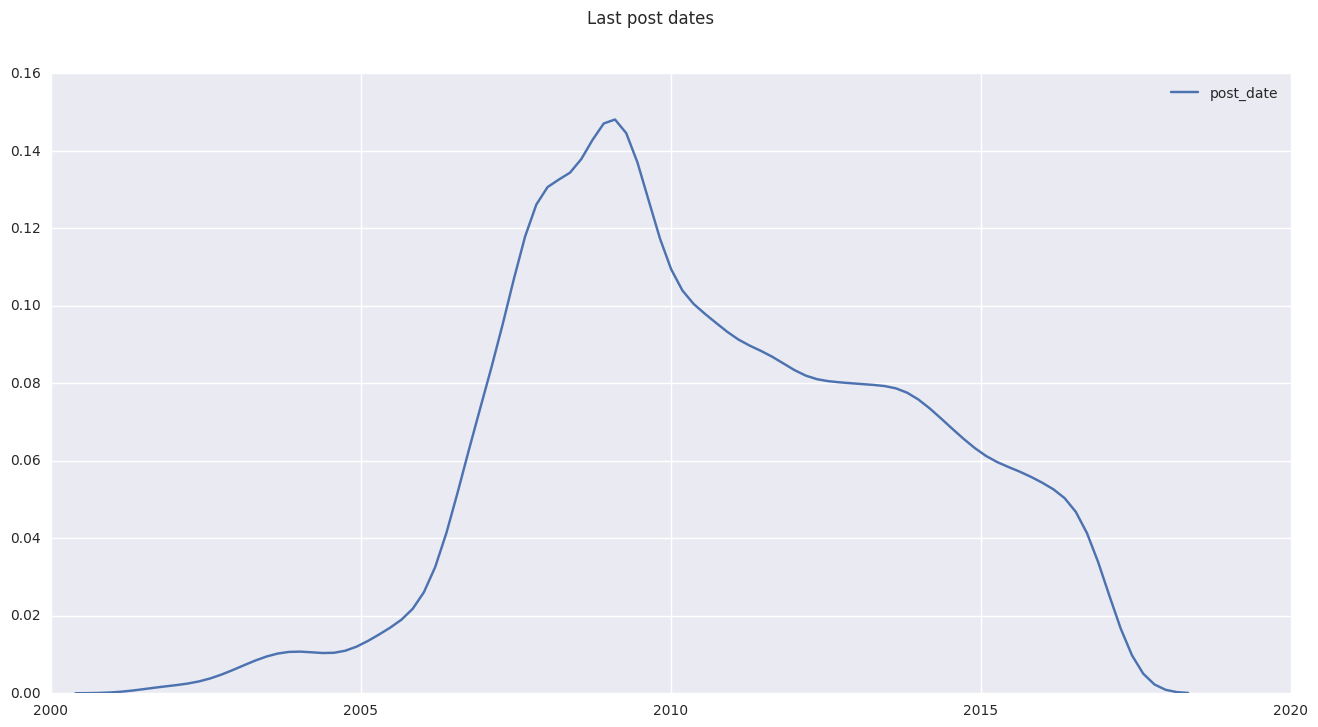

In [27]:
fig = plt.figure(figsize=(16, 8))
sns.kdeplot(last_post_floats)

fig.suptitle('Last post dates')

plt.show()

In [38]:
last_sustaining_posts = author_title_posts[author_title_posts.author_title.str.contains('Sustaining')].groupby('author').post_date.last()
last_general_member_posts = author_title_posts[author_title_posts.author_title == 'Forum Member'].groupby('author').post_date.last()

In [40]:
sns.kdeplot?

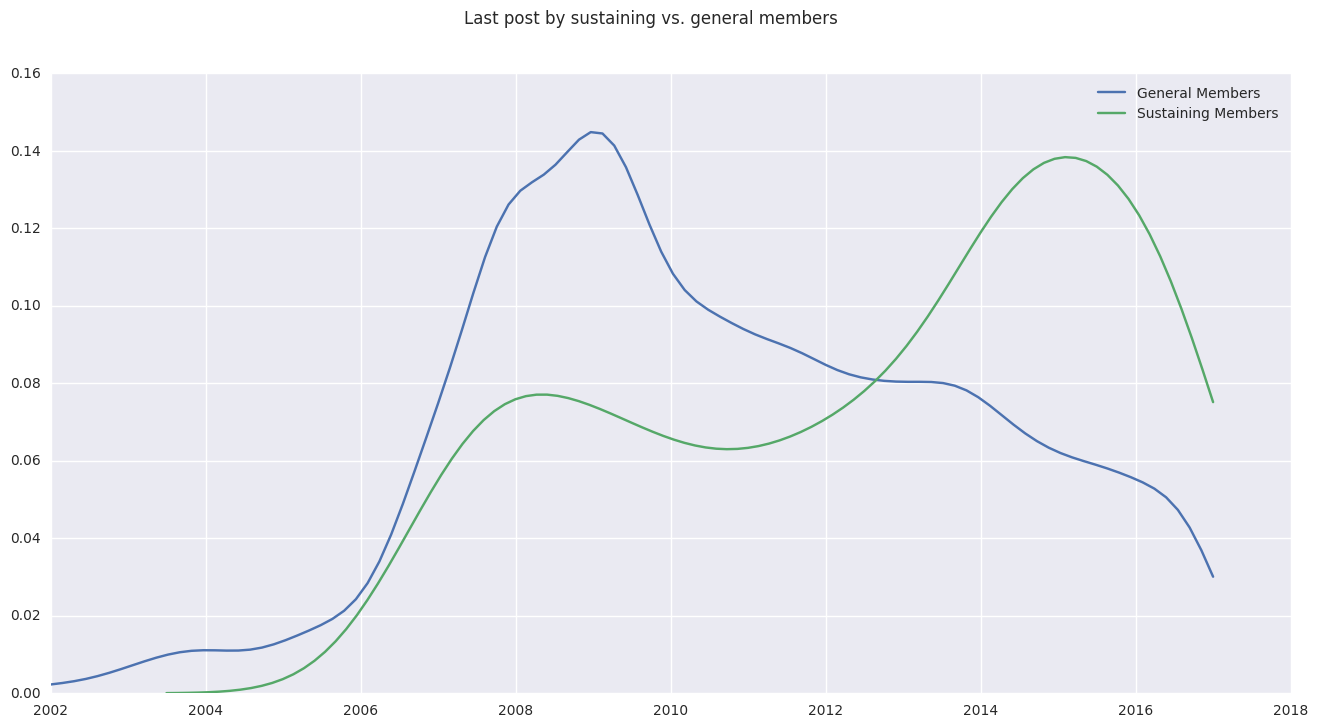

In [41]:
fig = plt.figure(figsize=(16, 8))

fig.suptitle('Last post by sustaining vs. general members')
sns.kdeplot(clip=[2002, 2017], data=pd.to_datetime(last_general_member_posts).apply(lambda row: row.year + row.month/12.0), label='General Members')
sns.kdeplot(clip=[2002, 2017], data=pd.to_datetime(last_sustaining_posts).apply(lambda row: row.year + row.month/12.0), label='Sustaining Members')

# Posts by account types

In [8]:
df_authors.author_title.value_counts()

Forum Member                                                                                                                                                                                                                12344
Account Inactive                                                                                                                                                                                                             1362
Account Disabled by Request                                                                                                                                                                                                   503
"Friend of Stormfront"Sustaining Member                                                                                                                                                                                       396
Open Forums - moderated                                                                         

In [9]:
df_authors.author_title[df_authors.author_title.str.contains('Core')]

2944     SF Core Support GroupLifetime"Friend of Stormf...
3204     SF Core Support GroupLifetime"Friend of Stormf...
4315     SF Core Support GroupLifetime"Friend of Stormf...
4464                                 SF Core Support Group
4665     SF Core Support GroupLifetime"Friend of Stormf...
4698     SF Core Support GroupLifetime"Friend of Stormf...
5303     SF Core Support GroupLifetime"Friend of Stormf...
6142     SF Core Support Group"Friend of Stormfront"Sus...
8431     SF Core Support GroupLifetime"Friend of Stormf...
8758     SF Core Support GroupLifetime"Friend of Stormf...
9138     SF Core Support Group"Friend of Stormfront"Sus...
12877    SF Core Support Group"Friend of Stormfront"Sus...
13459    SF Core Support Group"Friend of Stormfront"Sus...
Name: author_title, dtype: object

In [12]:
print(author_title_posts.shape)

author_title_posts.head()

(972846, 2)


,author_title,post_date
0,Forum Member,2007-05-24 15:19:00.000000
1,Forum Member,2007-05-24 15:27:00.000000
2,Account Inactive,2007-05-24 15:52:00.000000
3,Forum Member,2007-05-24 16:13:00.000000
4,Account Disabled by Request,2007-05-24 16:16:00.000000


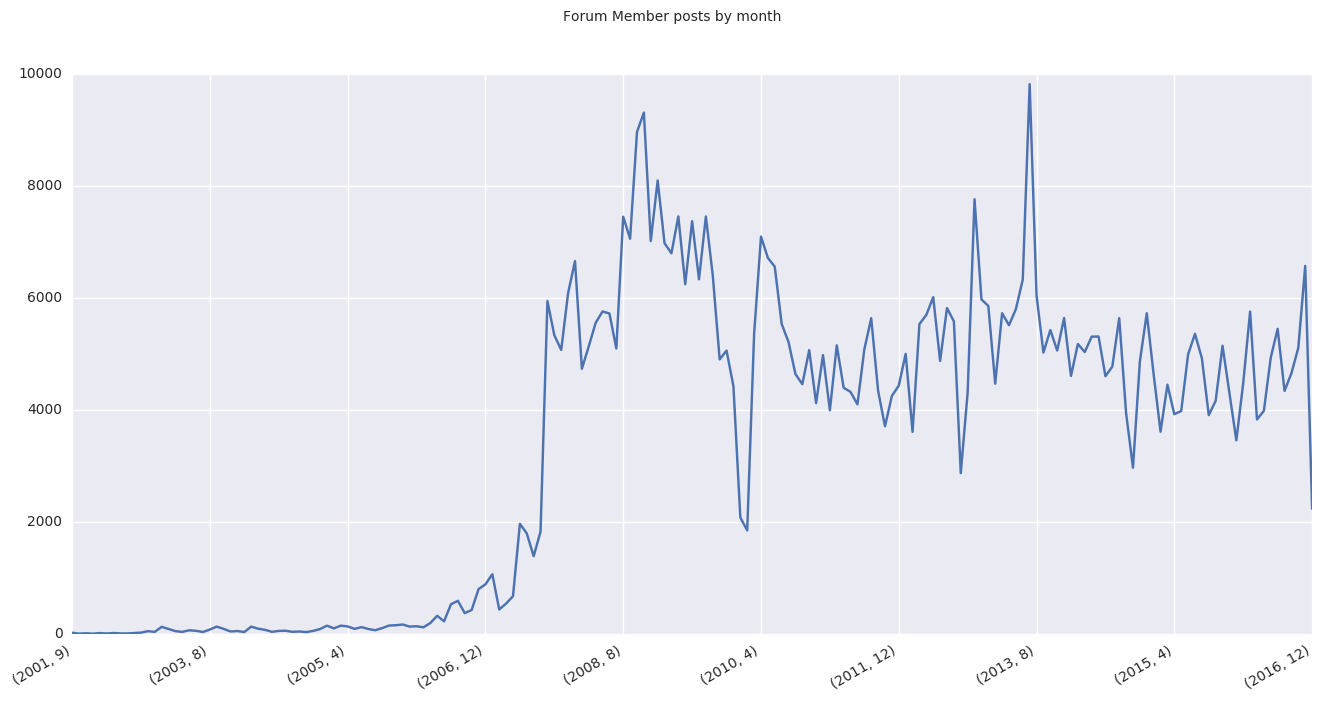

In [34]:
fig = plot_month_data(author_title_posts[author_title_posts.author_title == 'Forum Member'])

fig.suptitle('Forum Member posts by month')

plt.show()

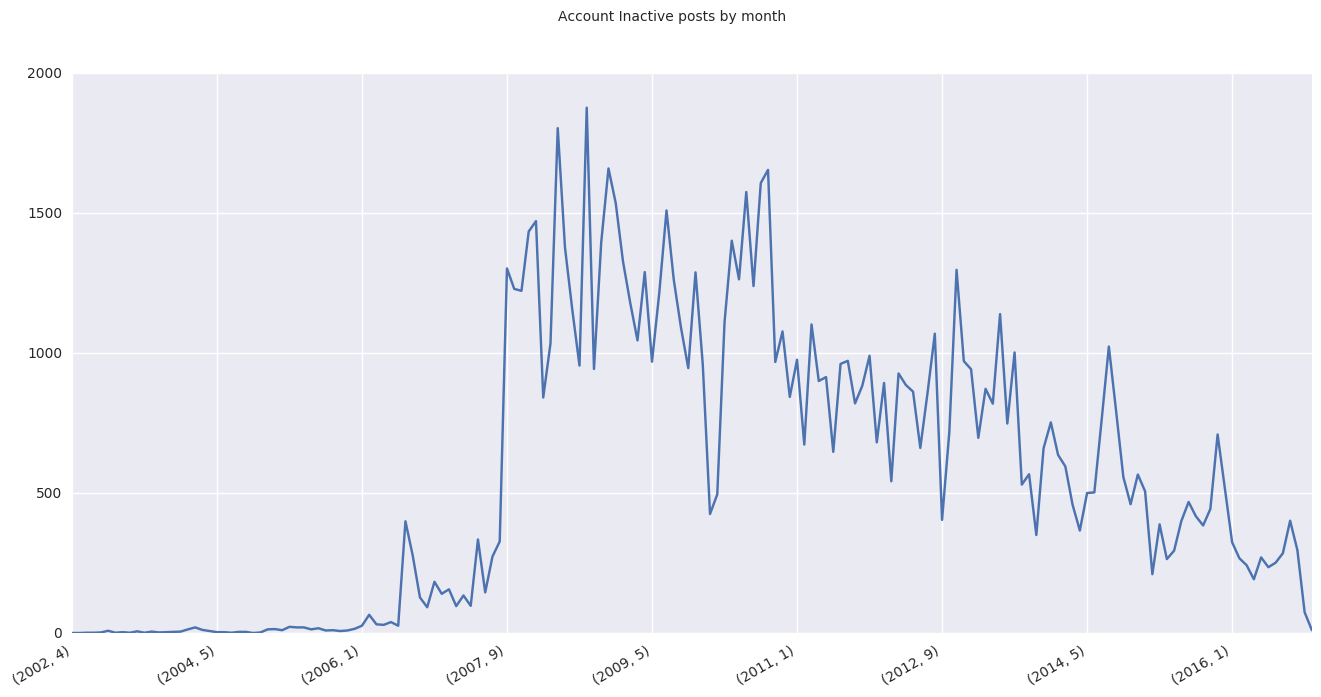

In [35]:
fig = plot_month_data(author_title_posts[author_title_posts.author_title == 'Account Inactive'])

fig.suptitle('Account Inactive posts by month')

plt.show()

In [37]:
df_authors.groupby('author').author_title.nunique().value_counts()

1    15448
Name: author_title, dtype: int64

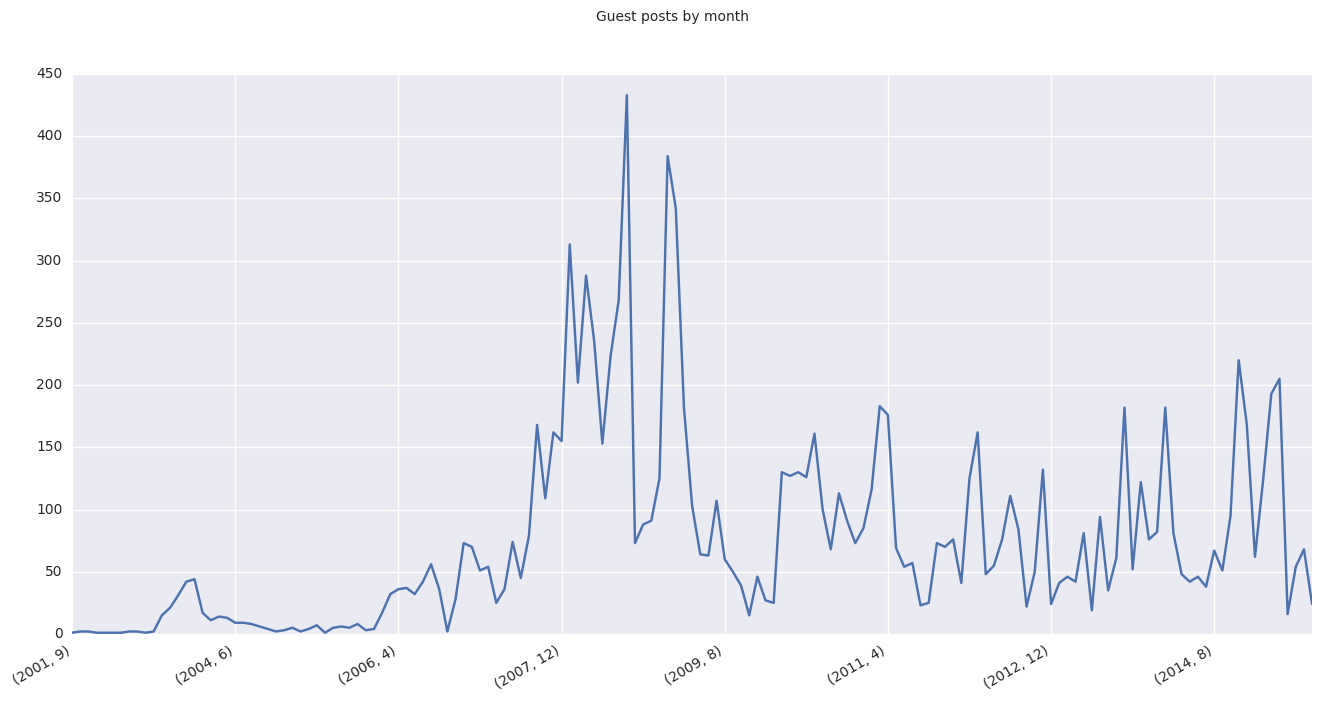

In [38]:
fig = plot_month_data(author_title_posts[author_title_posts.author_title == 'Guest'])

fig.suptitle('Guest posts by month')

plt.show()

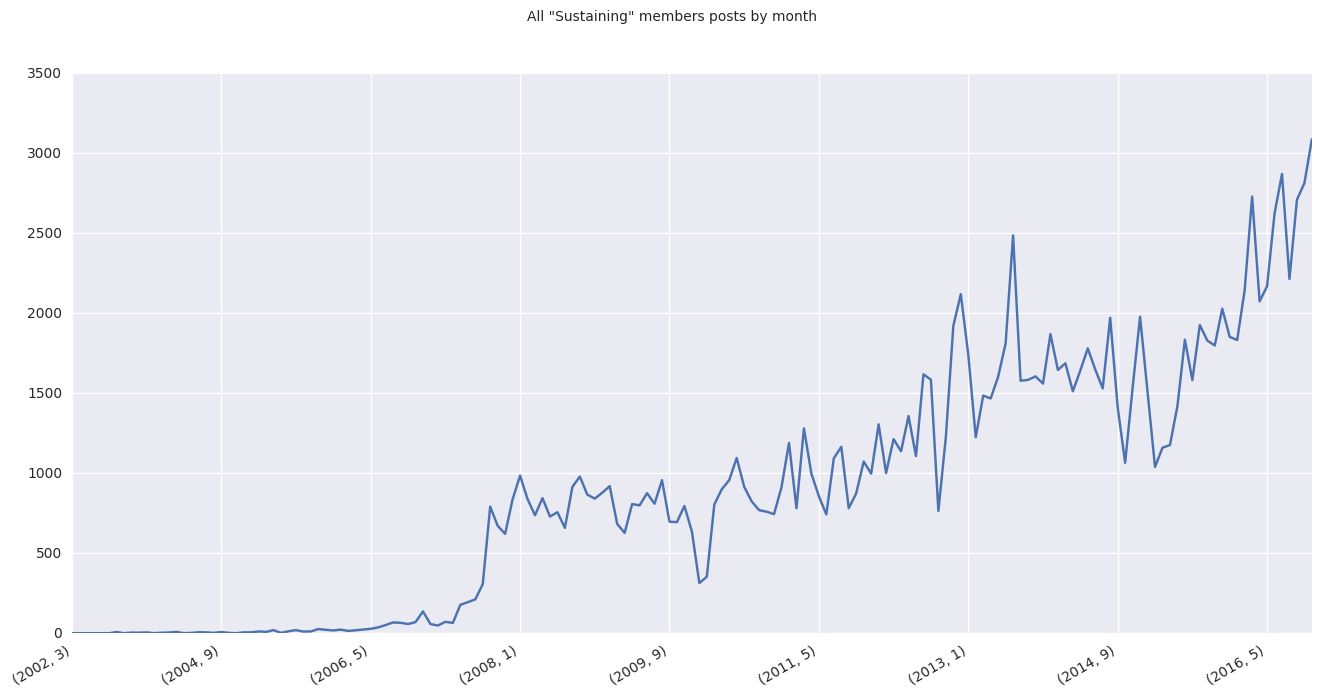

In [104]:
fig = plot_month_data(author_title_posts[author_title_posts.author_title.str.contains('Sustaining')])

fig.suptitle('All "Sustaining" members posts by month')

plt.show()

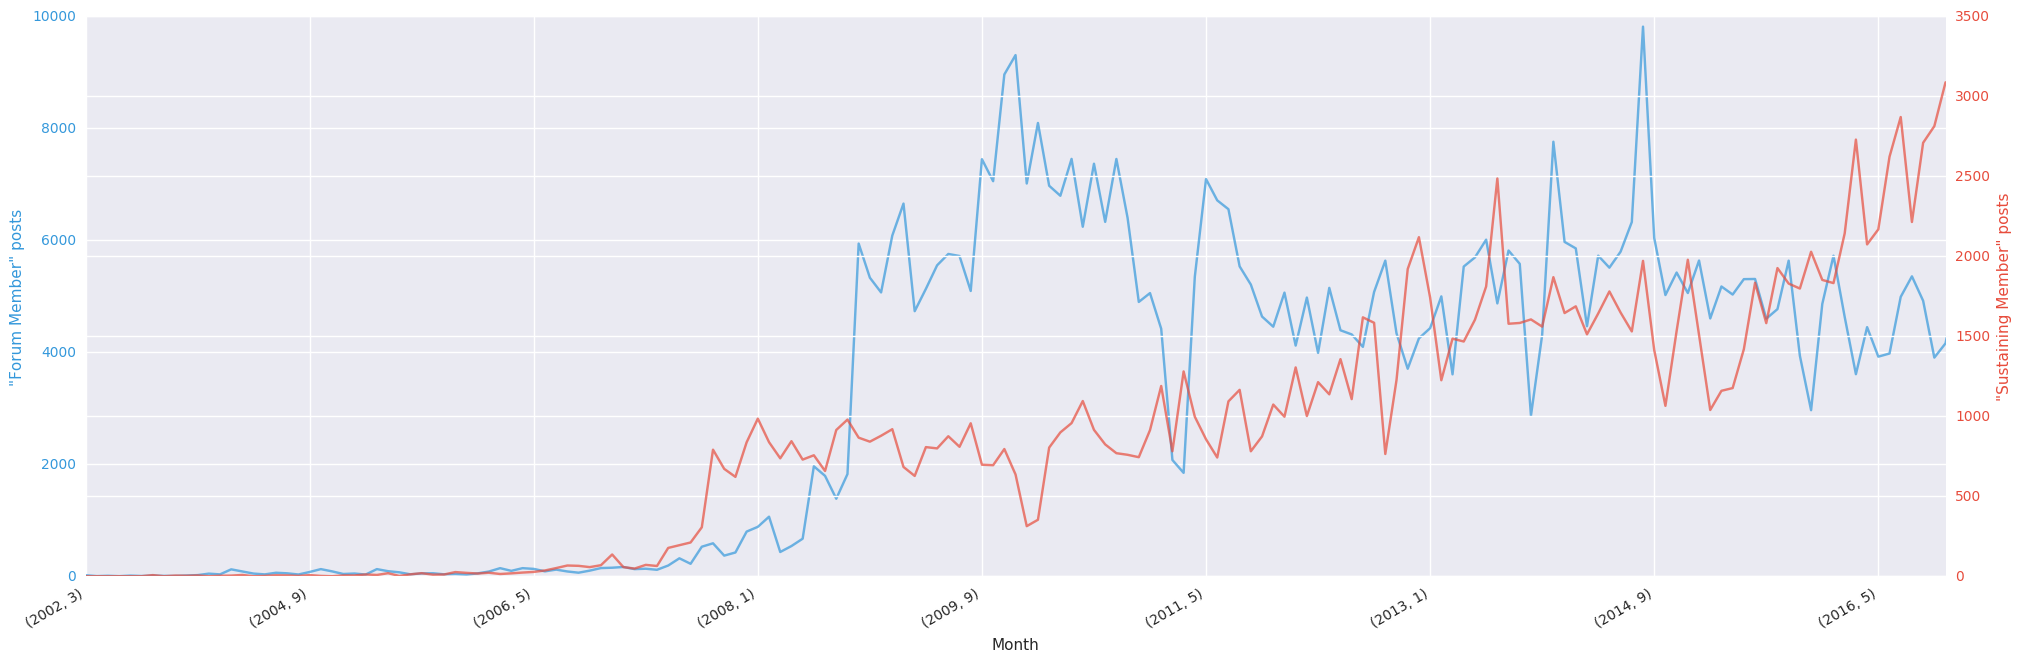

In [105]:
def plot_two(data1, data2, xlabel, ylabel1, ylabel2, title=''):
    fig, ax1 = plt.subplots(figsize=(24, 8))

    color1 = '#3498db'
    color2 = '#e74c3c'
    month_locator = mdates.MonthLocator(interval=3)

    ax1.set_title(title)
    data1.plot(ax=ax1, color=color1, alpha=0.7)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel1, color=color1)
    for tleft in ax1.get_yticklabels():
        tleft.set_color(color1)

    ax2 = ax1.twinx()
    data2.plot(ax=ax2, color=color2, alpha=0.7)
    ax2.set_ylabel(ylabel2, color=color2)
    for tright in ax2.get_yticklabels():
        tright.set_color(color2)
    
    fig.autofmt_xdate()
    plt.show()

def posts_by_month(df, datecol, targetcol):
    post_dates = pd.DatetimeIndex(df[datecol])
    return df.groupby([post_dates.year, post_dates.month]).count()[targetcol]

    
forum_member_posts = posts_by_month(
    author_title_posts[author_title_posts.author_title == 'Forum Member'],
    'post_date',
    'author_title'
)
sustaining_member_posts = posts_by_month(
    author_title_posts[author_title_posts.author_title.str.contains('Sustaining')],
    'post_date',
    'author_title'
)

plot_two(forum_member_posts[:-1], sustaining_member_posts[:-1], 'Month', '"Forum Member" posts', '"Sustaining Member" posts')

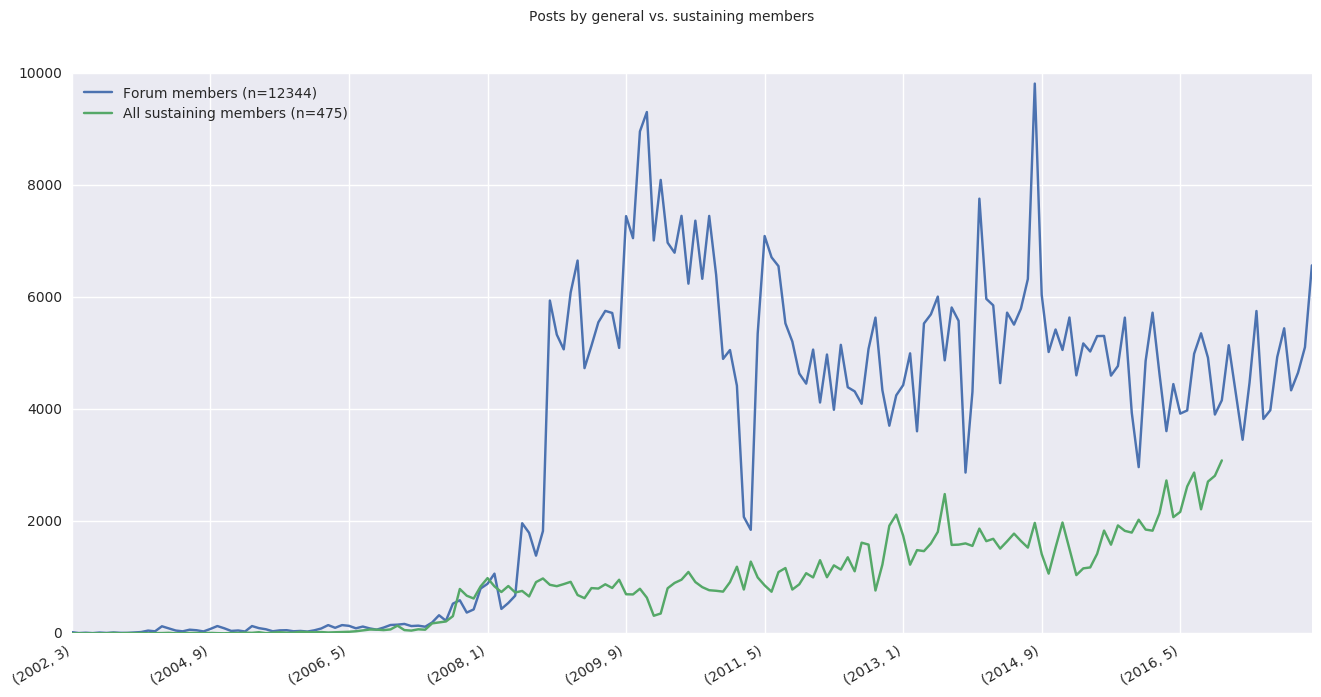

In [92]:
fig = plt.figure(figsize=(16, 8))
forum_member_posts[:-1].plot(label='Forum members (n=12344)')
sustaining_member_posts[:-1].plot(label='All sustaining members (n=475)')

plt.legend(loc='upper left')
fig.suptitle('Posts by general vs. sustaining members')
fig.autofmt_xdate()

In [68]:
df_authors.author_title.str.contains("Sustaining").sum()

475

In [79]:
friend_sustaining_member_posts = posts_by_month(
    author_title_posts[author_title_posts.author_title == '"Friend of Stormfront"Sustaining Member'],
    'post_date',
    'author_title'
)

lifetime_friend_sustaining_member_posts = posts_by_month(
    author_title_posts[author_title_posts.author_title == 'Lifetime"Friend of Stormfront"Sustaining Member'],
    'post_date',
    'author_title'
)


core_friend_sustaining_member_posts = posts_by_month(
    author_title_posts[author_title_posts.author_title == 'SF Core Support Group"Friend of Stormfront"Sustaining Member'],
    'post_date',
    'author_title'
)

core_lifetime_friend_sustaining_member_posts = posts_by_month(
    author_title_posts[author_title_posts.author_title == 'SF Core Support GroupLifetime"Friend of Stormfront"Sustaining Member'],
    'post_date',
    'author_title'
)

In [83]:
print((df_authors.author_title == '"Friend of Stormfront"Sustaining Member').sum()) 
print((df_authors.author_title == 'Lifetime"Friend of Stormfront"Sustaining Member').sum()) 
print((df_authors.author_title == 'SF Core Support Group"Friend of Stormfront"Sustaining Member').sum()) 
print((df_authors.author_title == 'SF Core Support GroupLifetime"Friend of Stormfront"Sustaining Member').sum())

396
66
4
8


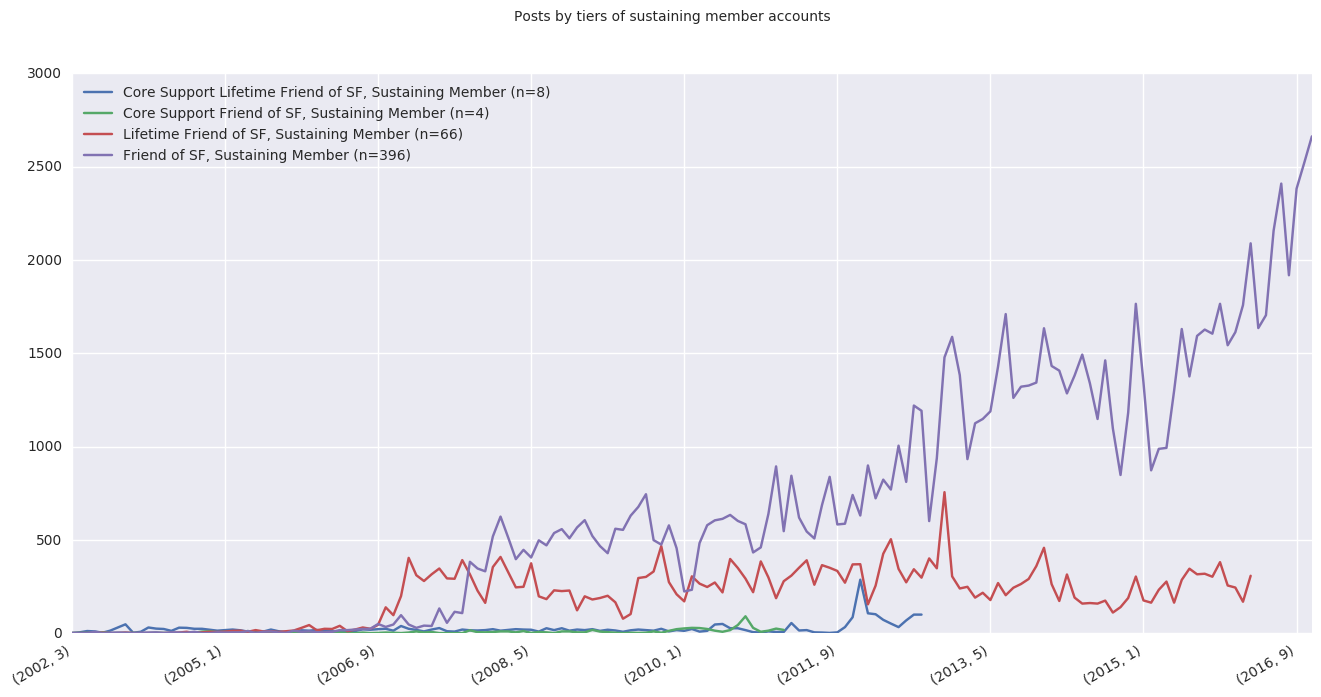

In [91]:
fig = plt.figure(figsize=(16, 8))

core_lifetime_friend_sustaining_member_posts[:-1].plot(label='Core Support Lifetime Friend of SF, Sustaining Member (n=8)')
core_friend_sustaining_member_posts[:-1].plot(label='Core Support Friend of SF, Sustaining Member (n=4)')
lifetime_friend_sustaining_member_posts[:-1].plot(label='Lifetime Friend of SF, Sustaining Member (n=66)')
friend_sustaining_member_posts[:-1].plot(label='Friend of SF, Sustaining Member (n=396)')

plt.legend(loc='upper left')
fig.suptitle('Posts by tiers of sustaining member accounts')

fig.autofmt_xdate()

In [98]:
df_authors[df_authors.author_title.str.contains('Moderator')]

index               18
author              18
author_join_date    18
author_location     16
author_posts        18
author_title        18
primary_state        1
dtype: int64

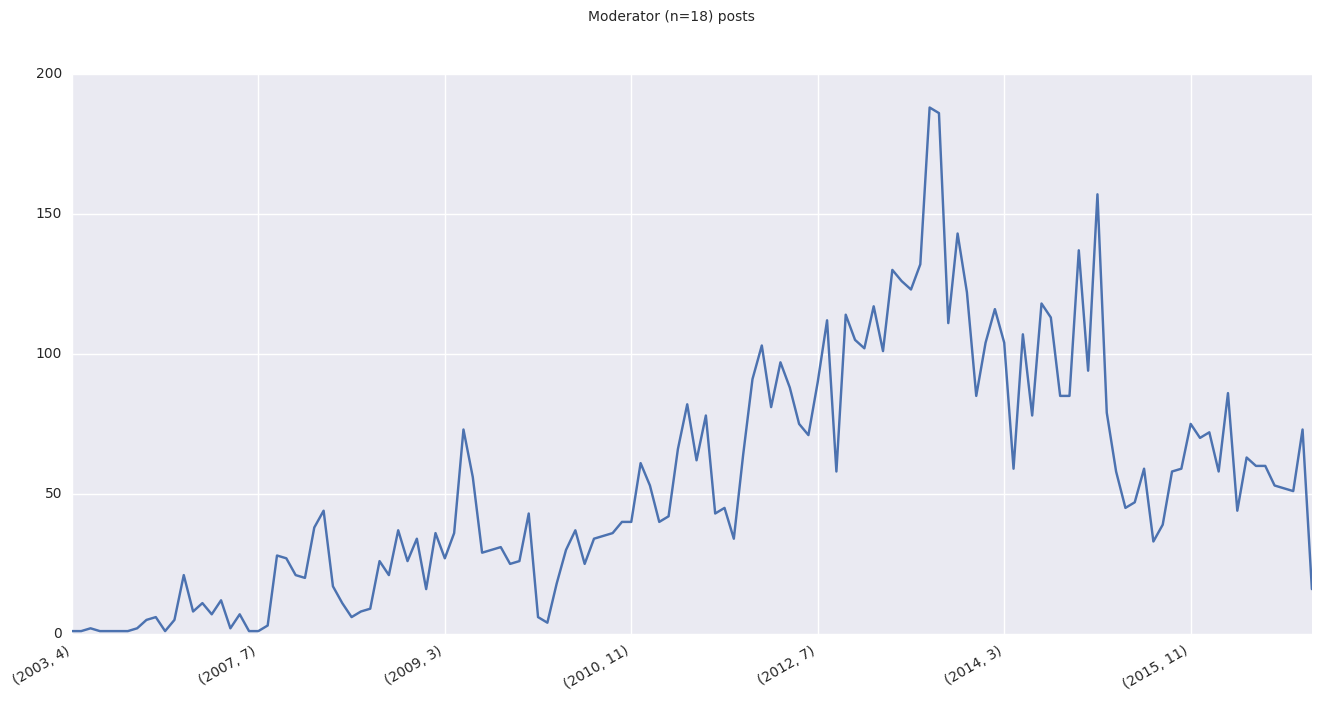

In [102]:
fig = plot_month_data(author_title_posts[author_title_posts.author_title.str.contains('Moderator')])

fig.suptitle('Moderator (n=18) posts')

plt.show()